# Modal Analysis of LTI systems


What is Modal analysis?
  - Analysis of the dynamical properties of a system in the frequency domain
  - We do not always know the entire system!

We need to be careful with the parameter inputs


System:
$m\ddot{x} + cẋ + kx = F$

Also known as

$$
\begin{bmatrix}
\dot{x}_1 \\ \dot{x}_2
\end{bmatrix}=
\begin{bmatrix}
  -c/m & -k/m \\
  1 & 0
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}+
\begin{bmatrix}
1 \\ 0
\end{bmatrix}*F
$$


Let us say that:

$m = 1$

$c = 0.1$

$k = 2$

Then the laplace trnasfer function is:
with the simplification of $m=1$

$$
X(S) = \underbrace{\frac{1}{s^2+cs+k}}_{H(s)}*((s+c)x(0) + \dot{x}(0)+U(s))
$$

we see that the system responds differently based on the initial state and selected input

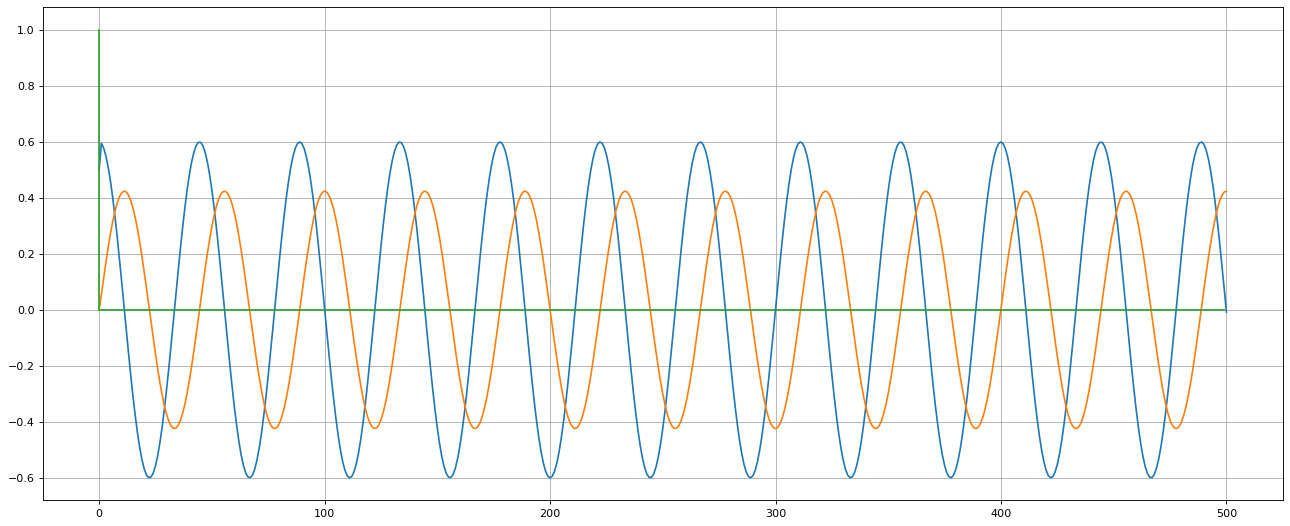

In [19]:
## Let's simulate with an impulse response
import numpy as np
import matplotlib.pyplot as plt

c = 0.05*0
m = 1
k = 2
dt = 0.1

N = 500

def mass_damper(x_1, x_2, u):
  x1_dot = -c*x_1/m - k*x_2/m + 1/m*u
  x2_dot = x_1
  return x1_dot, x2_dot

def rk4(x_1, x_2, u):
  k1 = mass_damper(x_1, x_2, u)
  k2 = mass_damper(x_1 + k1[0]*dt/2, x_2 + k1[1]*dt/2, u)
  k3 = mass_damper(x_1 + k2[0]*dt/2, x_2 + k2[1]*dt/2, u)
  k4 = mass_damper(x_1 + k3[0]*dt, x_2 + k3[1]*dt, u)
  x1_dot = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
  x2_dot = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
  return x1_dot, x2_dot


u = np.zeros(N)
u[0] = 1
x_1_0 = 0.5
x_2_0 = 0

x_1 = [x_1_0]
x_2 = [x_2_0]

for i in range(N):
  x1_dot, x2_dot = rk4(x_1[i], x_2[i], u[i])

  x1_new = x_1[i] + x1_dot*dt
  x2_new = x_2[i] + x2_dot*dt

  x_1.append(x1_new)
  x_2.append(x2_new)


plt.figure(figsize=(20, 8), dpi=80)
plt.plot(x_1)
plt.plot(x_2)
plt.step(np.arange(N), u)
plt.grid()
plt.show()


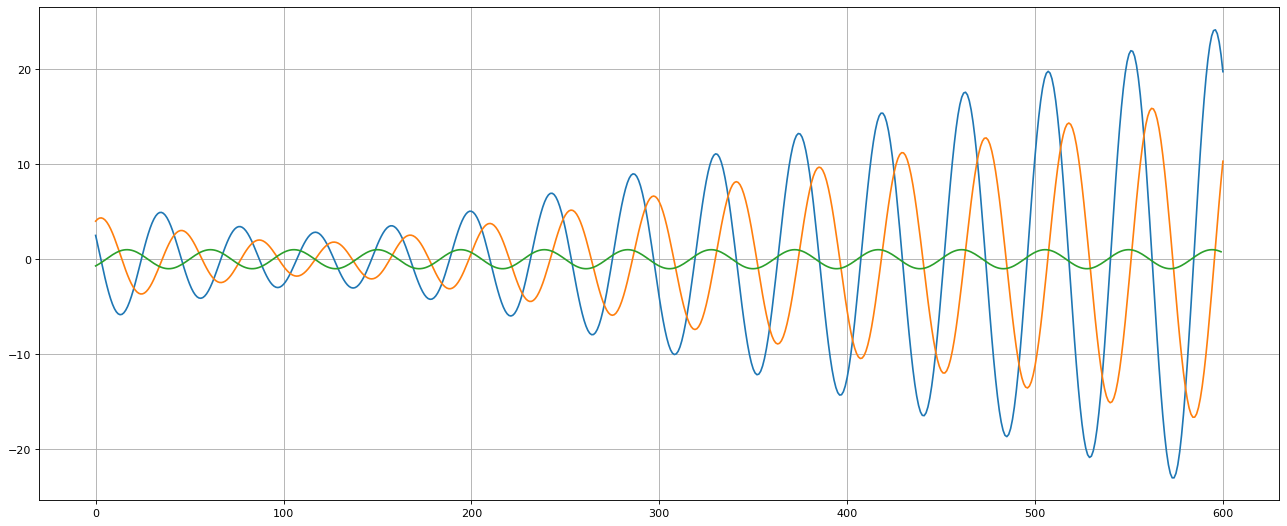

In [20]:
## Dangerous input!
nat_freq = np.sqrt(k/m)/(np.pi*2)
ux = np.sin(2*np.pi*np.arange(N+100)*nat_freq*dt-np.pi/4)*1

x_1 = [x_1_0+2]
x_2 = [x_2_0+4]
for i in range(N+100):
  x1_dot, x2_dot = rk4(x_1[i], x_2[i], ux[i])

  x1_new = x_1[i] + x1_dot*dt
  x2_new = x_2[i] + x2_dot*dt

  x_1.append(x1_new)
  x_2.append(x2_new)
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(x_1)
plt.plot(x_2)
plt.grid()
plt.plot(ux)
plt.show()


## Result Dancing Bridges!

![Tacoma Narrows Bridge Collapse](https://sites.lsa.umich.edu/ksmoore-new/wp-content/uploads/sites/1180/2018/06/tacoma-narrows-cropped.jpg)

# Example

Find steady state response of each mass:

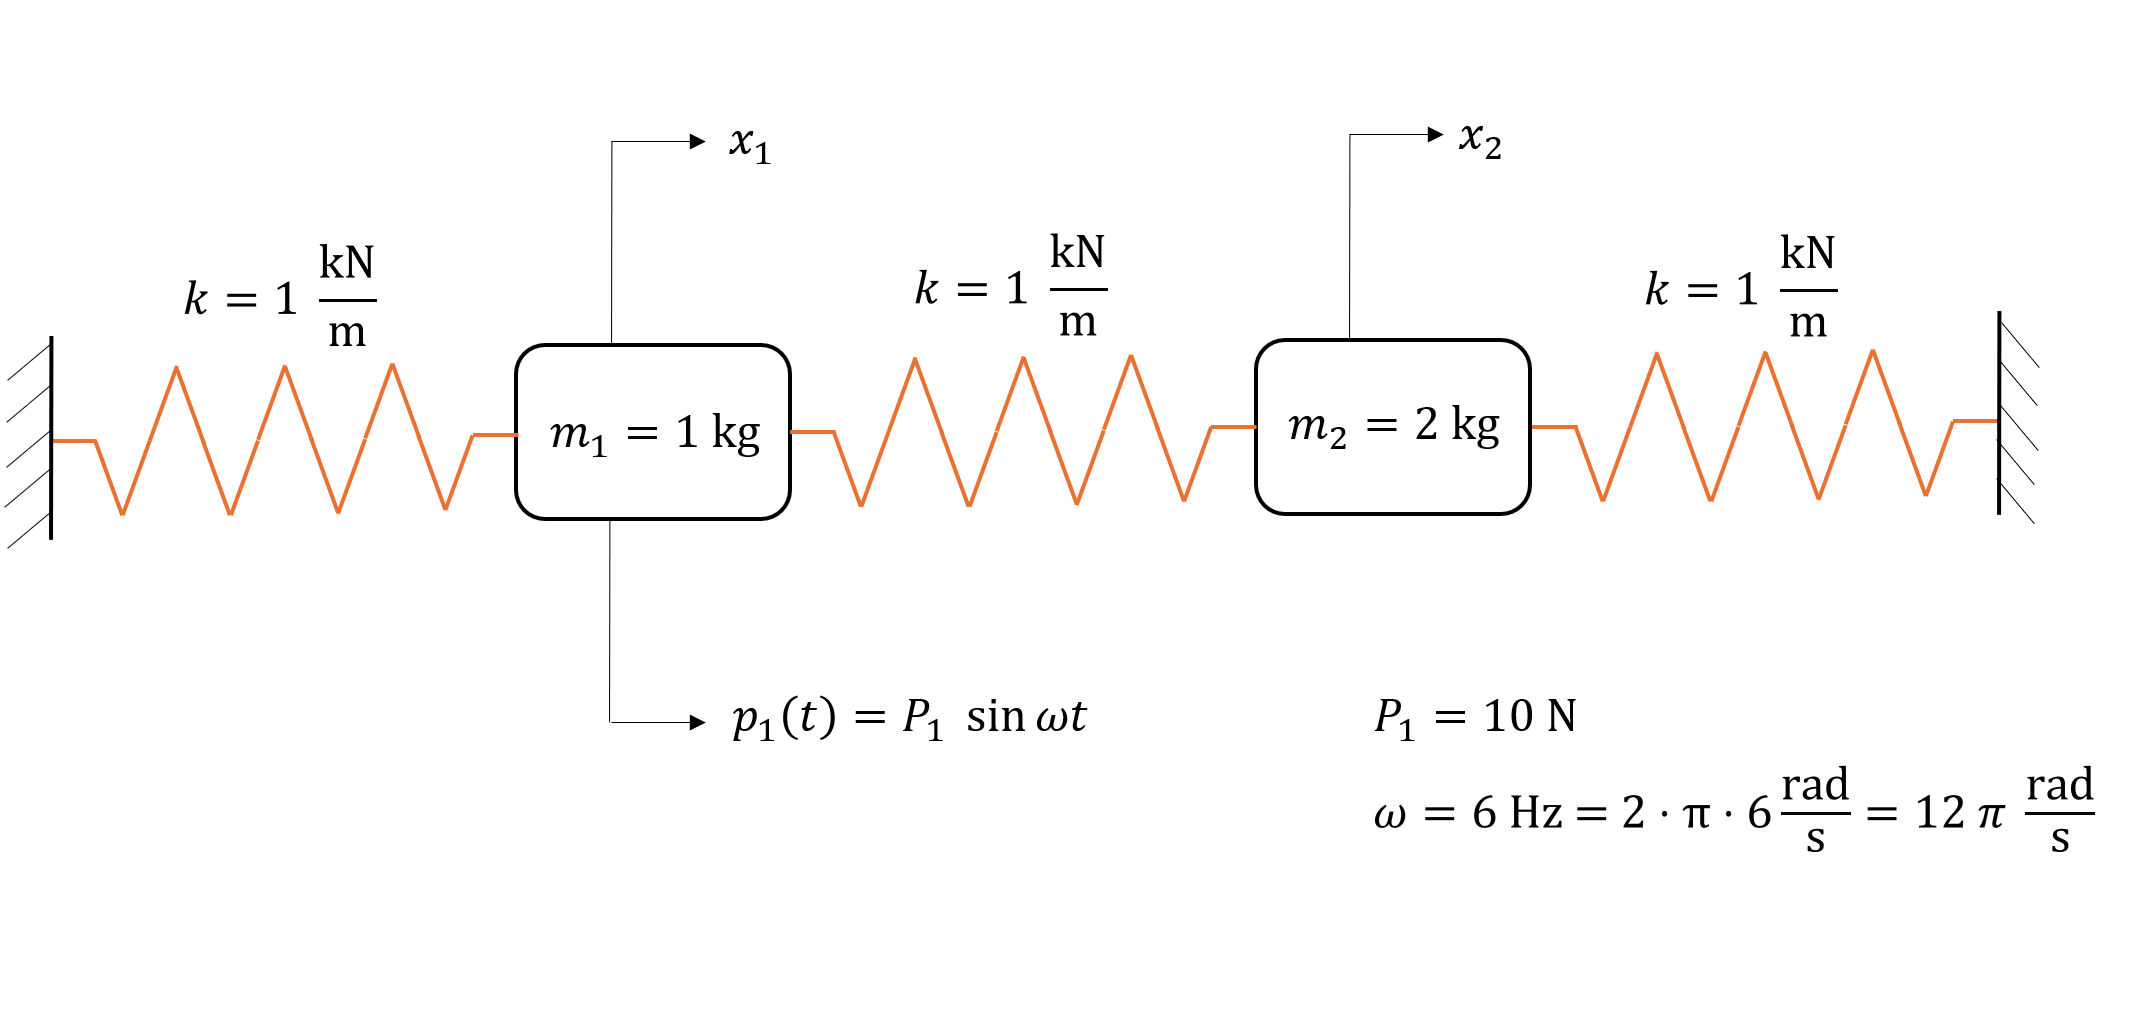

# Algorithm

### Step 1: Define equations of motion

$$
\begin{bmatrix}
  1 & 0 \\
  0 & 2
\end{bmatrix}
\left\lbrace\begin{array}{c}
\ddot{x}_1\\
\ddot{x}_2\\
\end{array}\right\rbrace +
\begin{bmatrix}
  2000 & -1000 \\
  -1000 & 2000
\end{bmatrix}
\left\lbrace\begin{array}{c}
x_1\\
x_2\\
\end{array}\right\rbrace =
\left\lbrace\begin{array}{c}
p_1(t)\\
0\\
\end{array}\right\rbrace
$$

### Step 2: Determine natural frequencies of the system using mechanical impedance matrix
$$
\begin{bmatrix}
2000 - \omega^2 & -1000\\
-1000 & 2000 - 2\omega^2
\end{bmatrix} = 0
$$

$$
(2000 - \omega^2)(2000 - 2\omega^2) - 1 \cdot 10^6 = 0
$$

$$
2\omega^4 - 6000\omega^2 + 3 \cdot 10^6 = 0
$$

$$
\omega_1^2 = 634\mathrm{s}^{-2} \rightarrow \omega_1 = 25.18 \frac{\mathrm{rad}}{\mathrm{s}} \rightarrow f_1 = 4.0\mathrm{Hz}
$$

$$
\omega_2^2 = 2366\mathrm{s}^{-2} \rightarrow \omega_2 = 48.64 \frac{\mathrm{rad}}{\mathrm{s}} \rightarrow f_2 = 7.7\mathrm{Hz}
$$



### Step 3: Find mode shapes by making $X_2 = 1.0$
Here we can scale one mode shape to one and fine relative motion of mode shape 2 by pluging in the omega in below formula for each mode:
$$
\begin{bmatrix}
2000 - \omega^2 & -1000\\
-1000 & 2000 - 2\omega^2
\end{bmatrix} =
\left\lbrace\begin{array}{c}
r\\
1\\
\end{array}\right\rbrace =
\left\lbrace\begin{array}{c}
0\\
0\\
\end{array}\right\rbrace
$$

For $\omega_1$:
$$
(2000 - 634)r_1 - 1000 = 0 \rightarrow r_1 = \frac{1000}{1366} = 0.732 \implies \{ X \}_1 =
\left\lbrace\begin{array}{c}
0.732\\
1\\
\end{array}\right\rbrace
$$

For $\omega_2$:
$$
(2000 - 2366)r_2 - 1000 = 0 \rightarrow r_2 = \frac{1000}{-366} = -2.732 \implies \{ X \}_2 =
\left\lbrace\begin{array}{c}
-2.732\\
1\\
\end{array}\right\rbrace
$$

This means that in mode 1 masses are moving in the same direction and mode 2 masses in oposite direction and mass one is not moving as much as mass two



### Step 4: Determine the modal masses and modal stiffnesses for each mode

Modal masses:
$$
\{ X \}_r^T [M] \{ X \}_r = M_r
$$

$$
M_1 =
\left\lbrace\begin{array}{c c}
0.732 & 1
\end{array}\right\rbrace
\begin{bmatrix}
  1 & 0 \\
  0 & 2
\end{bmatrix}
\left\lbrace\begin{array}{c}
0.732\\
1\\
\end{array}\right\rbrace =
2.54
$$

$$
M_2 =
\left\lbrace\begin{array}{c c}
-2.732 & 1
\end{array}\right\rbrace
\begin{bmatrix}
  1 & 0 \\
  0 & 2
\end{bmatrix}
\left\lbrace\begin{array}{c}
-2.732\\
1\\
\end{array}\right\rbrace =
9.46
$$

Modal stiffnesses:
$$
K_1 =
\left\lbrace\begin{array}{c c}
0.732 & 1
\end{array}\right\rbrace
\begin{bmatrix}
  2000 & 1000 \\
  1000 & 2000
\end{bmatrix}
\left\lbrace\begin{array}{c}
0.732\\
1\\
\end{array}\right\rbrace =
1608
$$

$$
K_2 =
\left\lbrace\begin{array}{c c}
-2.732 & 1
\end{array}\right\rbrace
\begin{bmatrix}
  2000 & 1000 \\
  1000 & 2000
\end{bmatrix}
\left\lbrace\begin{array}{c}
-2.732\\
1\\
\end{array}\right\rbrace =
22392
$$

### Step 5: Rescale to unit modal mass:
$$
\{U\}_r = \frac{\{ X \}_r }{\sqrt{M_r}}
$$

$$
\{U\}_1 =
\left\lbrace\begin{array}{c}
0.460\\
0.628\\
\end{array}\right\rbrace
\quad \mathrm{and} \quad
\{U\}_2 =
\left\lbrace\begin{array}{c}
-0.888\\
0.325\\
\end{array}\right\rbrace
$$

So the modal matrix $[\Phi]$ is:

$$
[\Phi] = \begin{bmatrix}
  \{ U \}_1 & \{ U \}_2
\end{bmatrix} = \begin{bmatrix}
  0.460 & -0.888 \\
  0.628 & 0.325
\end{bmatrix}
$$

Using modal matrix it can be shown that:
$$
[\Phi]^T[M][\Phi] =
\begin{bmatrix}
  1 & 0 \\
  0 & 1
\end{bmatrix} =
[I]
$$
$$
[\Phi]^T[K][\Phi] =
\begin{bmatrix}
  634 & 0 \\
  0 & 2366
\end{bmatrix} =
\begin{bmatrix}
  \omega_1^2 & 0 \\
  0 & \omega_2^2
\end{bmatrix}
$$

### Step 6: We account applied force by setting $\{ f(t) \} = [\Phi]^T \{ p(t) \}$:

$$
\left\lbrace\begin{array}{c}
f_1(t)\\
f_2(t)\\
\end{array}\right\rbrace =
\begin{bmatrix}
  0.460 & 0.628 \\
  -0.888 & 0.325
\end{bmatrix}
\left\lbrace\begin{array}{c}
p_1(t)\\
0\\
\end{array}\right\rbrace =
\left\lbrace\begin{array}{c}
0.460 \cdot p_1(t)\\
-0.888 \cdot p_1(t)\\
\end{array}\right\rbrace
$$

### Step 7: The modal equations for each mode

Mode 1:
$$
\ddot{q}_1 + \omega_1^2q_1 = f_1(t)
$$

$$
\ddot{q}_1 + 634^2q_1 = 0.460p_1(t)
$$

Let's see what is $p_1(t)$
$$
p_1(t) = P_1 \sin \omega t, \quad P_1 = 10\mathrm{N}
$$

$$
p_1(t) = 10 e^{j\omega t}
$$

by setting:
$$
q_i = Q_i e^{j \omega t}
$$

and differentiating as necessary we get the following for mode 1, where $\omega$ without a subscript is driving frequency

$$
-\omega^2 Q_1 e^{j \omega t} + 634 Q_1 e^{j \omega t} = 0.460 \cdot 10 e^{j \omega t}
$$

$$
Q_1 = \frac{10\cdot 0.460}{634 - (2\pi \cdot 6)^2} = -5.84 \cdot 10^{-3}
$$

Mode 2:
$$
\ddot{q}_2 + \omega_2^2 q_2 = f_2(t)
$$

$$
\ddot{q}_2 + 2366^2q_2 = -0.888 p_1(t)
$$

$$
-\omega Q_2 e^{j \omega t} + 2366 Q_2 e^{j \omega t} = -0.888 \cdot 10 e^{j \omega t}
$$

$$
Q_2 = \frac{10 \cdot -0.888}{634 - (2\pi \cdot 6)^2} = -9.40 \cdot 10^{-3}
$$


### Step 8: Determine displacements of the masses:
$$
{X} = [\Phi][Q]
$$

$$
\left\lbrace\begin{array}{c}
X_1\\
X_2\\
\end{array}\right\rbrace =
\begin{bmatrix}
  0.460 & -0.888 \\
  0.628 & 0.325
\end{bmatrix}
\left\lbrace\begin{array}{c}
Q_1\\
Q_2\\
\end{array}\right\rbrace
$$

$$
X_1 = 5.66 \cdot 10^{-3} \ \mathrm{m}
$$

$$
X_2 = -6.72 \cdot 10^{-3} \ \mathrm{m}
$$

Natural angular frequencies ω_n [rad/s]: [25.17885216 48.64180716]
Natural frequencies f_n [Hz]: [4.00733878 7.74158405]


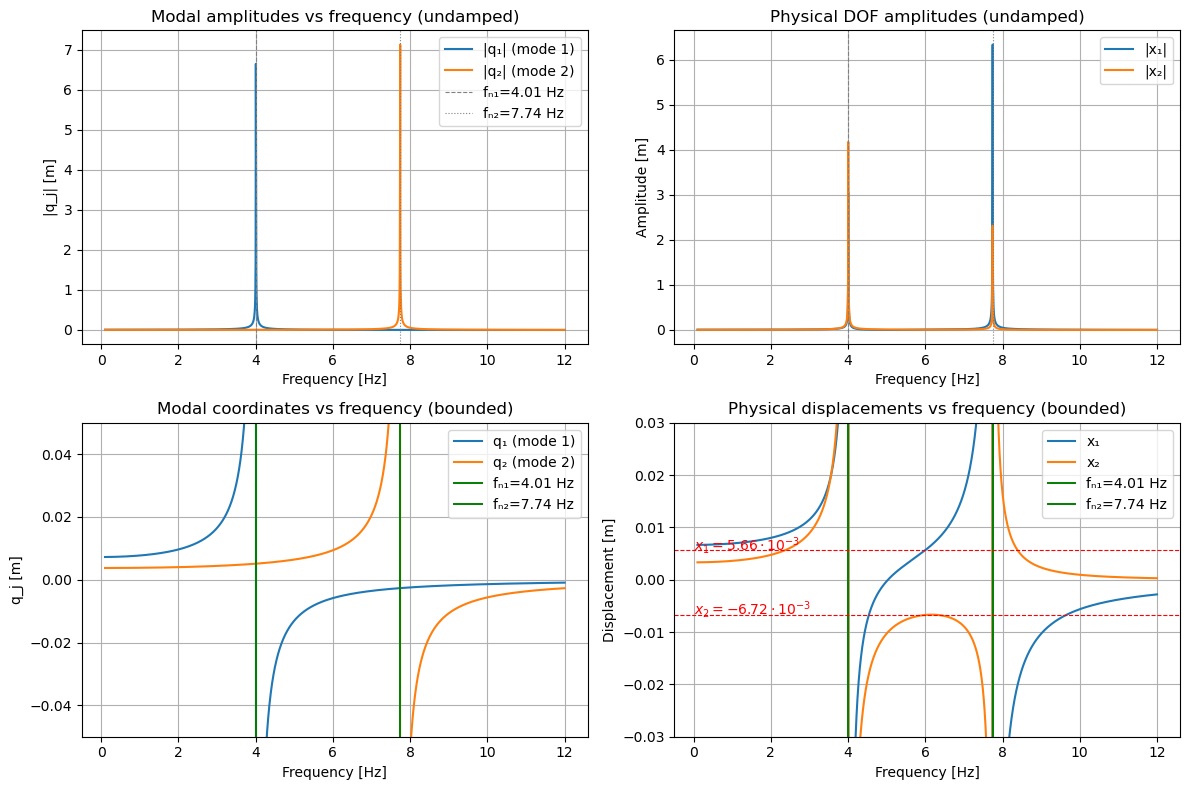


Steady-state response at f = 6.0 Hz:
Modal amplitudes (signed): [-0.00583934  0.00939957]
Physical amplitudes [x₁, x₂]: [ 0.00566317 -0.00672229]
Magnitude of displacements: [0.00566317 0.00672229]


In [22]:
# modal_2dof_system_bounded_2x2.py
import numpy as np
import matplotlib.pyplot as plt

# --- Given data ---
m1 = 1.0
m2 = 2.0
k = 1000.0
P1 = 10.0  # N

M = np.array([[m1, 0.0],
              [0.0, m2]])
K = np.array([[2*k, -k],
              [-k, 2*k]])

# --- Solve eigenvalue problem ---
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)  # λ = ω_n²
idx = np.argsort(eigvals)
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

omega_n = np.sqrt(eigvals)        # natural angular frequencies
f_n = omega_n / (2*np.pi)         # Hz

print("Natural angular frequencies ω_n [rad/s]:", omega_n)
print("Natural frequencies f_n [Hz]:", f_n)

# --- Normalize eigenvectors to unit modal mass ---
Phi = np.zeros_like(eigvecs)
for j in range(eigvecs.shape[1]):
    phi_j = eigvecs[:, j]
    m_modal = phi_j.T @ M @ phi_j
    Phi[:, j] = phi_j / np.sqrt(m_modal)

# --- Modal forces ---
F0 = np.array([P1, 0.0])
Q = Phi.T @ F0   # modal force amplitudes

# --- Frequency sweep ---
f_vals = np.linspace(0.1, 12.0, 2000)
omega_vals = 2*np.pi*f_vals

# Modal amplitudes (no damping)
q_hat = np.zeros((2, f_vals.size))
for i, w in enumerate(omega_vals):
    for j in range(2):
        denom = (omega_n[j]**2 - w**2)
        q_hat[j, i] = Q[j] / denom  # signed for bounded view

# Physical amplitudes
x_hat = Phi @ q_hat

# --- Evaluate steady-state at 6 Hz ---
f_test = 6.0
w_test = 2*np.pi*f_test
q_hat_test = np.zeros(2)
for j in range(2):
    denom = (omega_n[j]**2 - w_test**2)
    q_hat_test[j] = Q[j] / denom
x_hat_test = Phi @ q_hat_test

# --- Create 2×2 figure ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=100)
(ax1, ax2), (ax3, ax4) = axs

# === (1,1) Modal amplitudes (absolute values) ===
ax1.plot(f_vals, np.abs(q_hat[0,:]), label='|q₁| (mode 1)')
ax1.plot(f_vals, np.abs(q_hat[1,:]), label='|q₂| (mode 2)')
ax1.axvline(f_n[0], color='gray', ls='--', lw=0.8, label=f'fₙ₁={f_n[0]:.2f} Hz')
ax1.axvline(f_n[1], color='gray', ls=':', lw=0.8, label=f'fₙ₂={f_n[1]:.2f} Hz')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('|q_j| [m]')
ax1.set_title('Modal amplitudes vs frequency (undamped)')
ax1.grid(True)
ax1.legend()

# === (1,2) Physical DOF amplitudes (absolute) ===
ax2.plot(f_vals, np.abs(x_hat[0,:]), label='|x₁|')
ax2.plot(f_vals, np.abs(x_hat[1,:]), label='|x₂|')
ax2.axvline(f_n[0], color='gray', ls='--', lw=0.8)
ax2.axvline(f_n[1], color='gray', ls=':', lw=0.8)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude [m]')
ax2.set_title('Physical DOF amplitudes (undamped)')
ax2.grid(True)
ax2.legend()

# === (2,1) Bounded modal coordinates (signed) ===
ax3.plot(f_vals, q_hat[0,:], label='q₁ (mode 1)')
ax3.plot(f_vals, q_hat[1,:], label='q₂ (mode 2)')
ax3.axvline(f_n[0], color='green', lw=1.4, label=f'fₙ₁={f_n[0]:.2f} Hz')
ax3.axvline(f_n[1], color='green', lw=1.4, label=f'fₙ₂={f_n[1]:.2f} Hz')
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('q_j [m]')
ax3.set_ylim(-0.05, 0.05)
ax3.set_title('Modal coordinates vs frequency (bounded)')
ax3.grid(True)
ax3.legend()

# === (2,2) Bounded displacements (signed) ===
ax4.plot(f_vals, x_hat[0,:], label='x₁')
ax4.plot(f_vals, x_hat[1,:], label='x₂')
ax4.axvline(f_n[0], color='green', lw=1.4, label=f'fₙ₁={f_n[0]:.2f} Hz')
ax4.axvline(f_n[1], color='green', lw=1.4, label=f'fₙ₂={f_n[1]:.2f} Hz')
ax4.axhline(x_hat_test[0], color='red', ls='--', lw=0.8)
ax4.axhline(x_hat_test[1], color='red', ls='--', lw=0.8)
ax4.text(0, x_hat_test[0], '$x_1 = 5.66 \\cdot 10^{-3}$', fontsize=10, color='red')
ax4.text(0, x_hat_test[1], '$x_2 = -6.72 \\cdot 10^{-3}$', fontsize=10, color='red')
ax4.set_xlabel('Frequency [Hz]')
ax4.set_ylabel('Displacement [m]')
ax4.set_ylim(-0.03, 0.03)
ax4.set_title('Physical displacements vs frequency (bounded)')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()

# --- Print steady-state results ---
print(f"\nSteady-state response at f = {f_test} Hz:")
print("Modal amplitudes (signed):", q_hat_test)
print("Physical amplitudes [x₁, x₂]:", x_hat_test)
print("Magnitude of displacements:", np.abs(x_hat_test))


### Displacements in the time domain:

<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
C:\Users\PhD\AppData\Local\Temp\ipykernel_28112\3500481839.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0, x_hat_test[0], '$x_1 = 5.66 \cdot 10^{-3}$', fontsize=10, color='red')
C:\Users\PhD\AppData\Local\Temp\ipykernel_28112\3500481839.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0, x_hat_test[1], '$x_2 = -6.72 \cdot 10^{-3}$', fontsize=10, color='red')


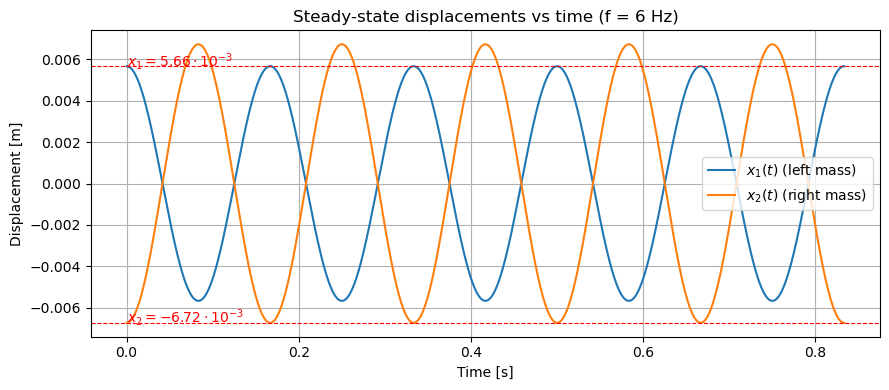

In [37]:
# ======================================
# TIME RESPONSE (steady-state)
# ======================================

# Use the excitation frequency and computed steady-state amplitudes
omega_exc = w_test  # = 2π*6 rad/s
X1 = x_hat_test[0]
X2 = x_hat_test[1]

# Time vector (5 cycles)
T = 1 / f_test
t = np.linspace(0, 5*T, 2000)

# Displacements in time domain (steady-state)
x1_t = np.real(X1 * np.exp(1j * omega_exc * t))
x2_t = np.real(X2 * np.exp(1j * omega_exc * t))

# --- Plot displacement vs time ---
plt.figure(figsize=(9,4))
plt.plot(t, x1_t, label=r'$x_1(t)$ (left mass)')
plt.plot(t, x2_t, label=r'$x_2(t)$ (right mass)')
plt.axhline(x_hat_test[0], color='red', ls='--', lw=0.8)
plt.axhline(x_hat_test[1], color='red', ls='--', lw=0.8)
plt.text(0, x_hat_test[0], '$x_1 = 5.66 \cdot 10^{-3}$', fontsize=10, color='red')
plt.text(0, x_hat_test[1], '$x_2 = -6.72 \cdot 10^{-3}$', fontsize=10, color='red')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.title('Steady-state displacements vs time (f = 6 Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Modal analysis given an unknown system

We need the Natural frequencies

In [20]:
from sympy import Symbol, Matrix
from sympy.utilities.lambdify import lambdify, implemented_function
import numpy as np
from copy import deepcopy
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from IPython.display import Latex, Math

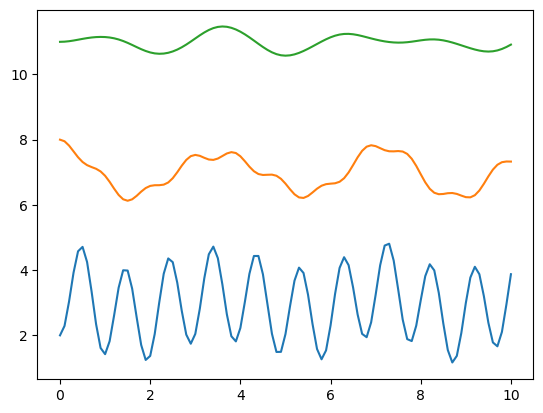

In [38]:
m1 = 1
m2 = 5
m3 = 10
M = np.diag([m1,m2,m3])
dt = 0.1
Minv = np.linalg.inv(M)

k1 = 20
k2 = 20
k3 = 10
k4 = 50
K = np.array([[k1+k2, -k2, 0], [-k2,k3+k2,-k3 ],[0,-k3, k4+k3]])




def mass_damper(x, xd):
  xd_dot = -Minv@K@x
  xdot = xd
  return  xd,xd_dot


def rk4(x, xd):
  k1 = mass_damper(x, xd)
  k2 = mass_damper(x + k1[0]*dt/2, xd + k1[1]*dt/2)
  k3 = mass_damper(x + k2[0]*dt/2, xd + k2[1]*dt/2)
  k4 = mass_damper(x + k3[0]*dt, xd + k3[1]*dt)
  xdot = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
  xd_dot = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
  return xdot, xd_dot



xd_0 = np.array([0,0,0])
x_0 = np.array([-1,1,0])

x = [x_0]
xd = [xd_0]

N = 100

time = np.arange(0, N*dt+dt, dt)

for n in range(N):
  x_d, xd_d = rk4(x[n], xd[n])
  x_new = x[n] + x_d*dt
  xd_new = xd[n] + xd_d*dt
  x.append(x_new)
  xd.append(xd_new)

x = np.array(x)



fig= plt.figure()


plt.plot(time, x[:,0]+3)
plt.plot(time, x[:,1]+7)
plt.plot(time, x[:,2]+11)
plt.show()



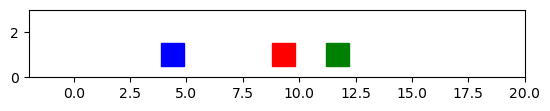

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Example position data (replace with your own)
x1_positions = x[:,0]+3
x2_positions = x[:,1]+7
x3_positions = x[:,2]+11

# Box dimensions
box_width = 1.0
box_height = 1.0
y_position = 0.5

# Set up figure
fig, ax = plt.subplots()
ax.set_xlim(-2, 20)
ax.set_ylim(0, 3)
ax.set_aspect('equal')

# Create rectangles
box1 = patches.Rectangle((x1_positions[0], y_position), box_width, box_height, color='blue')
box2 = patches.Rectangle((x2_positions[0], y_position ), box_width, box_height, color='red')
box3 = patches.Rectangle((x3_positions[0], y_position ), box_width, box_height, color='green')
ax.add_patch(box1)
ax.add_patch(box2)
ax.add_patch(box3)
# Update function
def update(frame):
    box1.set_x(x1_positions[frame])
    box2.set_x(x2_positions[frame])
    box3.set_x(x3_positions[frame])
    return box1, box2, box3

# Create animation
ani = FuncAnimation(fig, update, frames=len(x1_positions), interval=50, blit=True)

# Display animation in Colab
HTML(ani.to_jshtml())

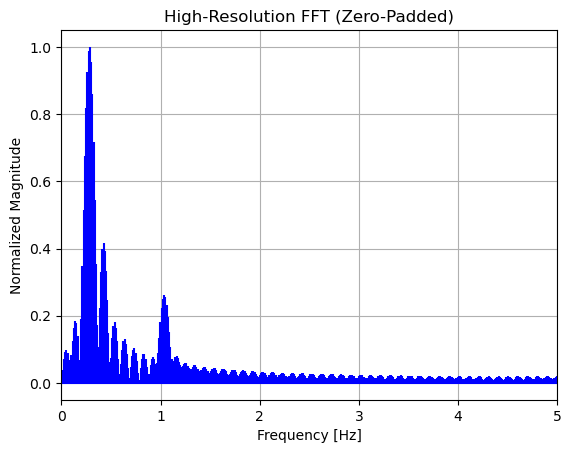

In [30]:
## FFT to analyze frequency
from scipy.fft import fft, fftfreq

# Original number of samples
N = len(time)
T = dt

# Zero-pad to length N_pad (e.g., 4096)
N_pad = 801
signal = x[:, 1] - np.mean(x[:, 1])  # remove DC

# Pad with zeros
signal_padded = np.pad(signal, (0, N_pad - N), 'constant')

# FFT with zero-padding
yf = fft(signal_padded)
xf = fftfreq(N_pad, T)

# Only positive frequencies
idx = np.where(xf >= 0)
xf = xf[idx]
yf = np.abs(yf[idx])
yf = yf / np.max(yf)  # normalize

# Plot
plt.figure()
plt.stem(xf, yf,'b', \
         markerfmt=" ", basefmt="-b")
plt.title('High-Resolution FFT (Zero-Padded)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Normalized Magnitude')
plt.xlim(0, 5)
plt.grid(True)
plt.show()


In [31]:
from scipy.signal import find_peaks
import numpy as np

# Find all peaks in the FFT magnitude
peaks, properties = find_peaks(yf, height=0.1)  # adjust height threshold as needed

# Get peak heights and corresponding frequencies
peak_heights = properties['peak_heights']
peak_freqs = xf[peaks]


# Sort peaks by height (magnitude), descending
sorted_indices = np.argsort(peak_heights)[::-1]

# Take the top 2
top_3_freqs = peak_freqs[sorted_indices[:3]]

top_2_magnitudes = peak_heights[sorted_indices[:3]]

# Sort frequencies for readability
top_3_freqs = np.sort(top_3_freqs)

print(top_3_freqs)

# Print results
print("Top 2 estimated natural frequencies (Hz):", top_3_freqs)

[0.28714107 0.42446941 1.03620474]
Top 2 estimated natural frequencies (Hz): [0.28714107 0.42446941 1.03620474]


In [29]:
from scipy.linalg import eigh

# Solve generalized eigenvalue problem: K φ = λ M φ
eigenvals, eigenvecs = eigh(K, M)

# Natural frequencies (rad/s)
omega_n = np.sqrt(eigenvals)
# Natural frequencies (Hz)
f_n = omega_n / (2 * np.pi)

print("Natural frequencies (rad/s):", omega_n)
print("Natural frequencies (Hz):", f_n)
print("Seconds of periodes:", 1/f_n)

Natural frequencies (rad/s): [1.76990771 2.57970416 6.49711883]
Natural frequencies (Hz): [0.28168956 0.41057267 1.03404858]
Seconds of periodes: [3.5500073  2.43562243 0.96707255]


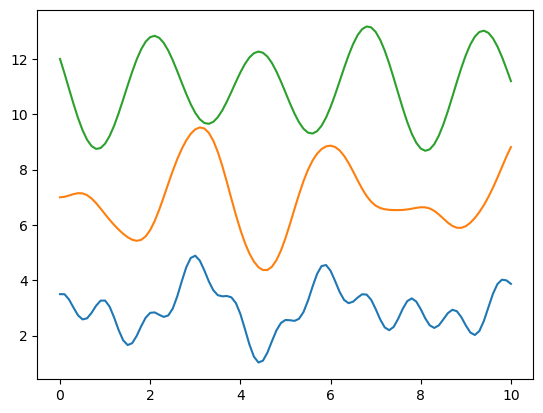

In [39]:
## A bad input

m1 = 1
m2 = 5
m3 = 10
M = np.diag([m1,m2,m3])
dt = 0.1
Minv = np.linalg.inv(M)

k1 = 20
k2 = 20
k3 = 10
k4 = 50
K = np.array([[k1+k2, -k2, 0], [-k2,k3+k2,-k3 ],[0,-k3, k4+k3]])



def mass_damper(x, xd):
  xd_dot = -Minv@K@x
  xdot = xd
  return  xd,xd_dot


def rk4(x, xd):
  k1 = mass_damper(x, xd)
  k2 = mass_damper(x + k1[0]*dt/2, xd + k1[1]*dt/2)
  k3 = mass_damper(x + k2[0]*dt/2, xd + k2[1]*dt/2)
  k4 = mass_damper(x + k3[0]*dt, xd + k3[1]*dt)
  xdot = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
  xd_dot = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
  return xdot, xd_dot



xd_0 = np.array([1,0,-5])
x_0 = np.array([0.5,0, 1])

x = [x_0]
xd = [xd_0]

N = 100

time = np.arange(0, N*dt+dt, dt)

for n in range(N):
  x_d, xd_d = rk4(x[n], xd[n])
  x_new = x[n] + x_d*dt
  xd_new = xd[n] + xd_d*dt
  x.append(x_new)
  xd.append(xd_new)

x = np.array(x)



fig= plt.figure()


plt.plot(time, x[:,0]+3)
plt.plot(time, x[:,1]+7)
plt.plot(time, x[:,2]+11)
plt.show()



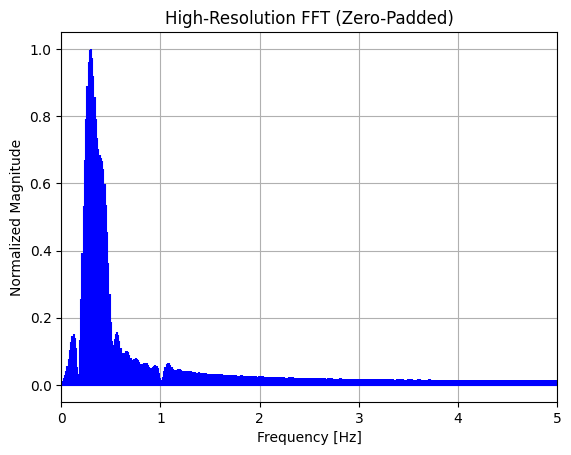

In [34]:
from scipy.fft import fft, fftfreq

# Original number of samples
N = len(time)
T = dt

# Zero-pad to length N_pad (e.g., 4096)
N_pad = 801
signal = x[:, 1] - np.mean(x[:, 1])  # remove DC

# Pad with zeros
signal_padded = np.pad(signal, (0, N_pad - N), 'constant')

# FFT with zero-padding
yf = fft(signal_padded)
xf = fftfreq(N_pad, T)

# Only positive frequencies
idx = np.where(xf >= 0)
xf = xf[idx]
yf = np.abs(yf[idx])
yf = yf / np.max(yf)  # normalize

# Plot
plt.figure()
plt.stem(xf, yf,'b', \
         markerfmt=" ", basefmt="-b")
plt.title('High-Resolution FFT (Zero-Padded)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Normalized Magnitude')
plt.xlim(0, 5)
plt.grid(True)
plt.show()


In [35]:
from scipy.signal import find_peaks
import numpy as np

# Find all peaks in the FFT magnitude
peaks, properties = find_peaks(yf, height=0.1)  # adjust height threshold as needed

# Get peak heights and corresponding frequencies
peak_heights = properties['peak_heights']
peak_freqs = xf[peaks]


# Sort peaks by height (magnitude), descending
sorted_indices = np.argsort(peak_heights)[::-1]

# Take the top 2
top_3_freqs = peak_freqs[sorted_indices[:3]]

top_2_magnitudes = peak_heights[sorted_indices[:3]]

# Sort frequencies for readability
top_3_freqs = np.sort(top_3_freqs)

print(top_3_freqs)

# Print results
print("Top 2 estimated natural frequencies (Hz):", top_3_freqs)

[0.12484395 0.29962547 0.56179775]
Top 2 estimated natural frequencies (Hz): [0.12484395 0.29962547 0.56179775]


In [36]:
from scipy.linalg import eigh

# Solve generalized eigenvalue problem: K φ = λ M φ
eigenvals, eigenvecs = eigh(K, M)

# Natural frequencies (rad/s)
omega_n = np.sqrt(eigenvals)
# Natural frequencies (Hz)
f_n = omega_n / (2 * np.pi)

print("Natural frequencies (rad/s):", omega_n)
print("Natural frequencies (Hz):", f_n)
print("Seconds of periodes:", 1/f_n)

Natural frequencies (rad/s): [1.76990771 2.57970416 6.49711883]
Natural frequencies (Hz): [0.28168956 0.41057267 1.03404858]
Seconds of periodes: [3.5500073  2.43562243 0.96707255]
